# Telco Customer Churn Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load the dataset

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

## Data Preprocessing

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Data Analysis (EDA)

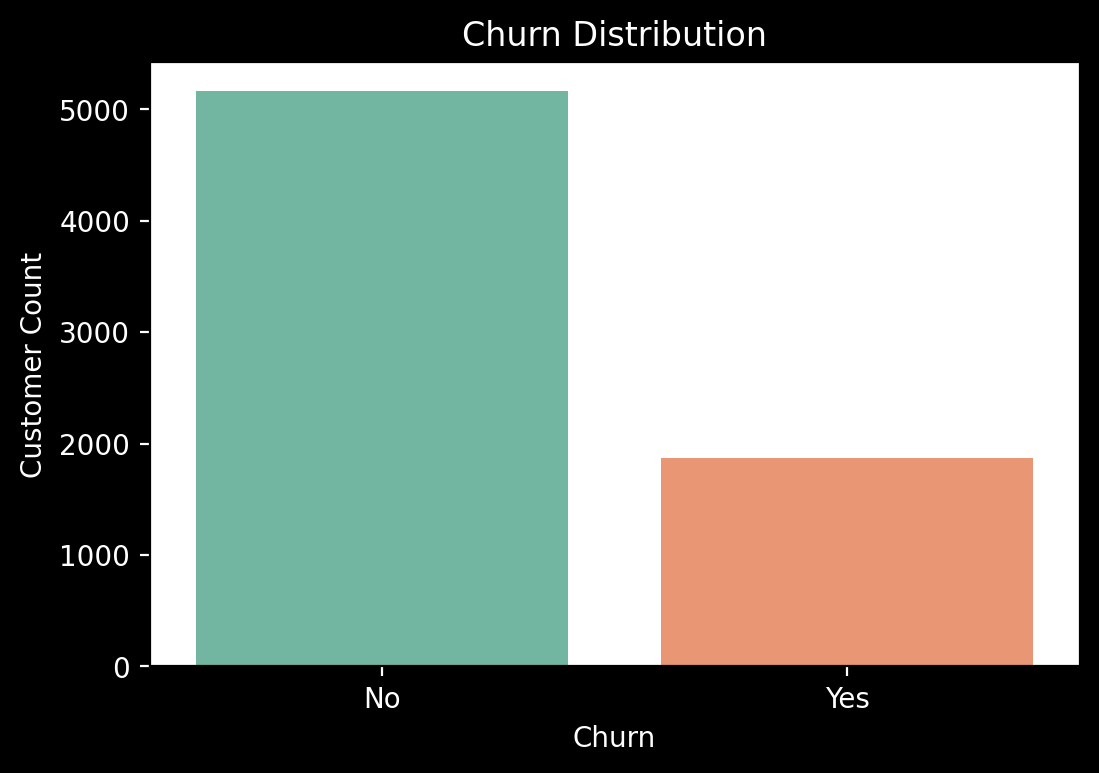

In [7]:
plt.figure(figsize=(6, 4), dpi=200)

plt.gcf().patch.set_facecolor('black')

sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Churn Distribution', color='white')
plt.xlabel('Churn', color='white')
plt.ylabel('Customer Count', color='white')

plt.tick_params(axis='both', colors='white')

plt.savefig("images/churn_distribution.png")

plt.show()

In [8]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numeric_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


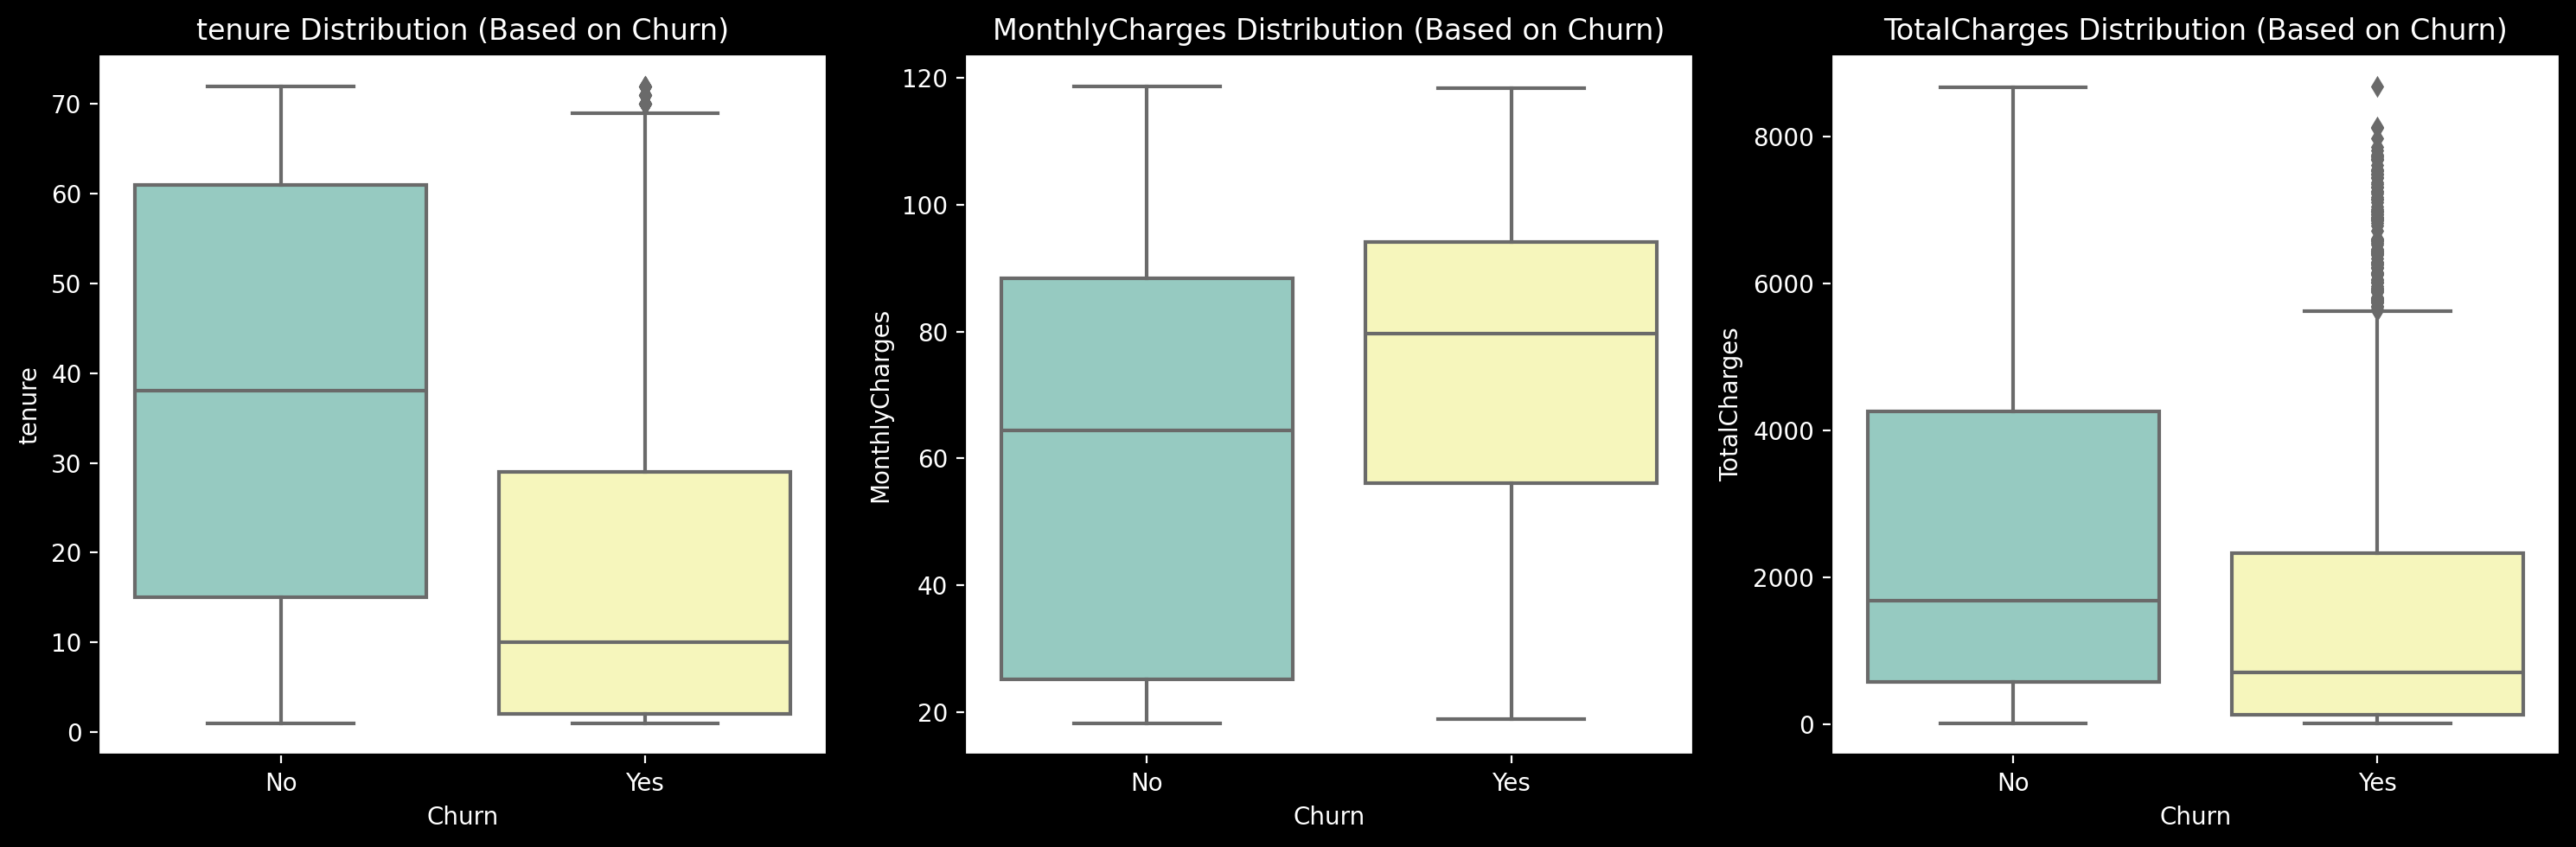

In [9]:
plt.figure(figsize=(15, 5), dpi=200)

plt.gcf().patch.set_facecolor('black')

for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=feature, data=data, palette='Set3')
    plt.title(f'{feature} Distribution (Based on Churn)', color='white', fontsize=12)
    plt.xlabel('Churn', color='white')
    plt.ylabel(feature, color='white')
    
    plt.tick_params(axis='both', colors='white')

plt.savefig("images/feature_distribution.png")
plt.tight_layout()
plt.show()

Encode categorical variables using One-Hot Encoding for categorical features with limited unique values.

In [10]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
one_hot_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
data = pd.get_dummies(data, columns=one_hot_features, drop_first=False)

In [12]:
corr_df = data.corr()

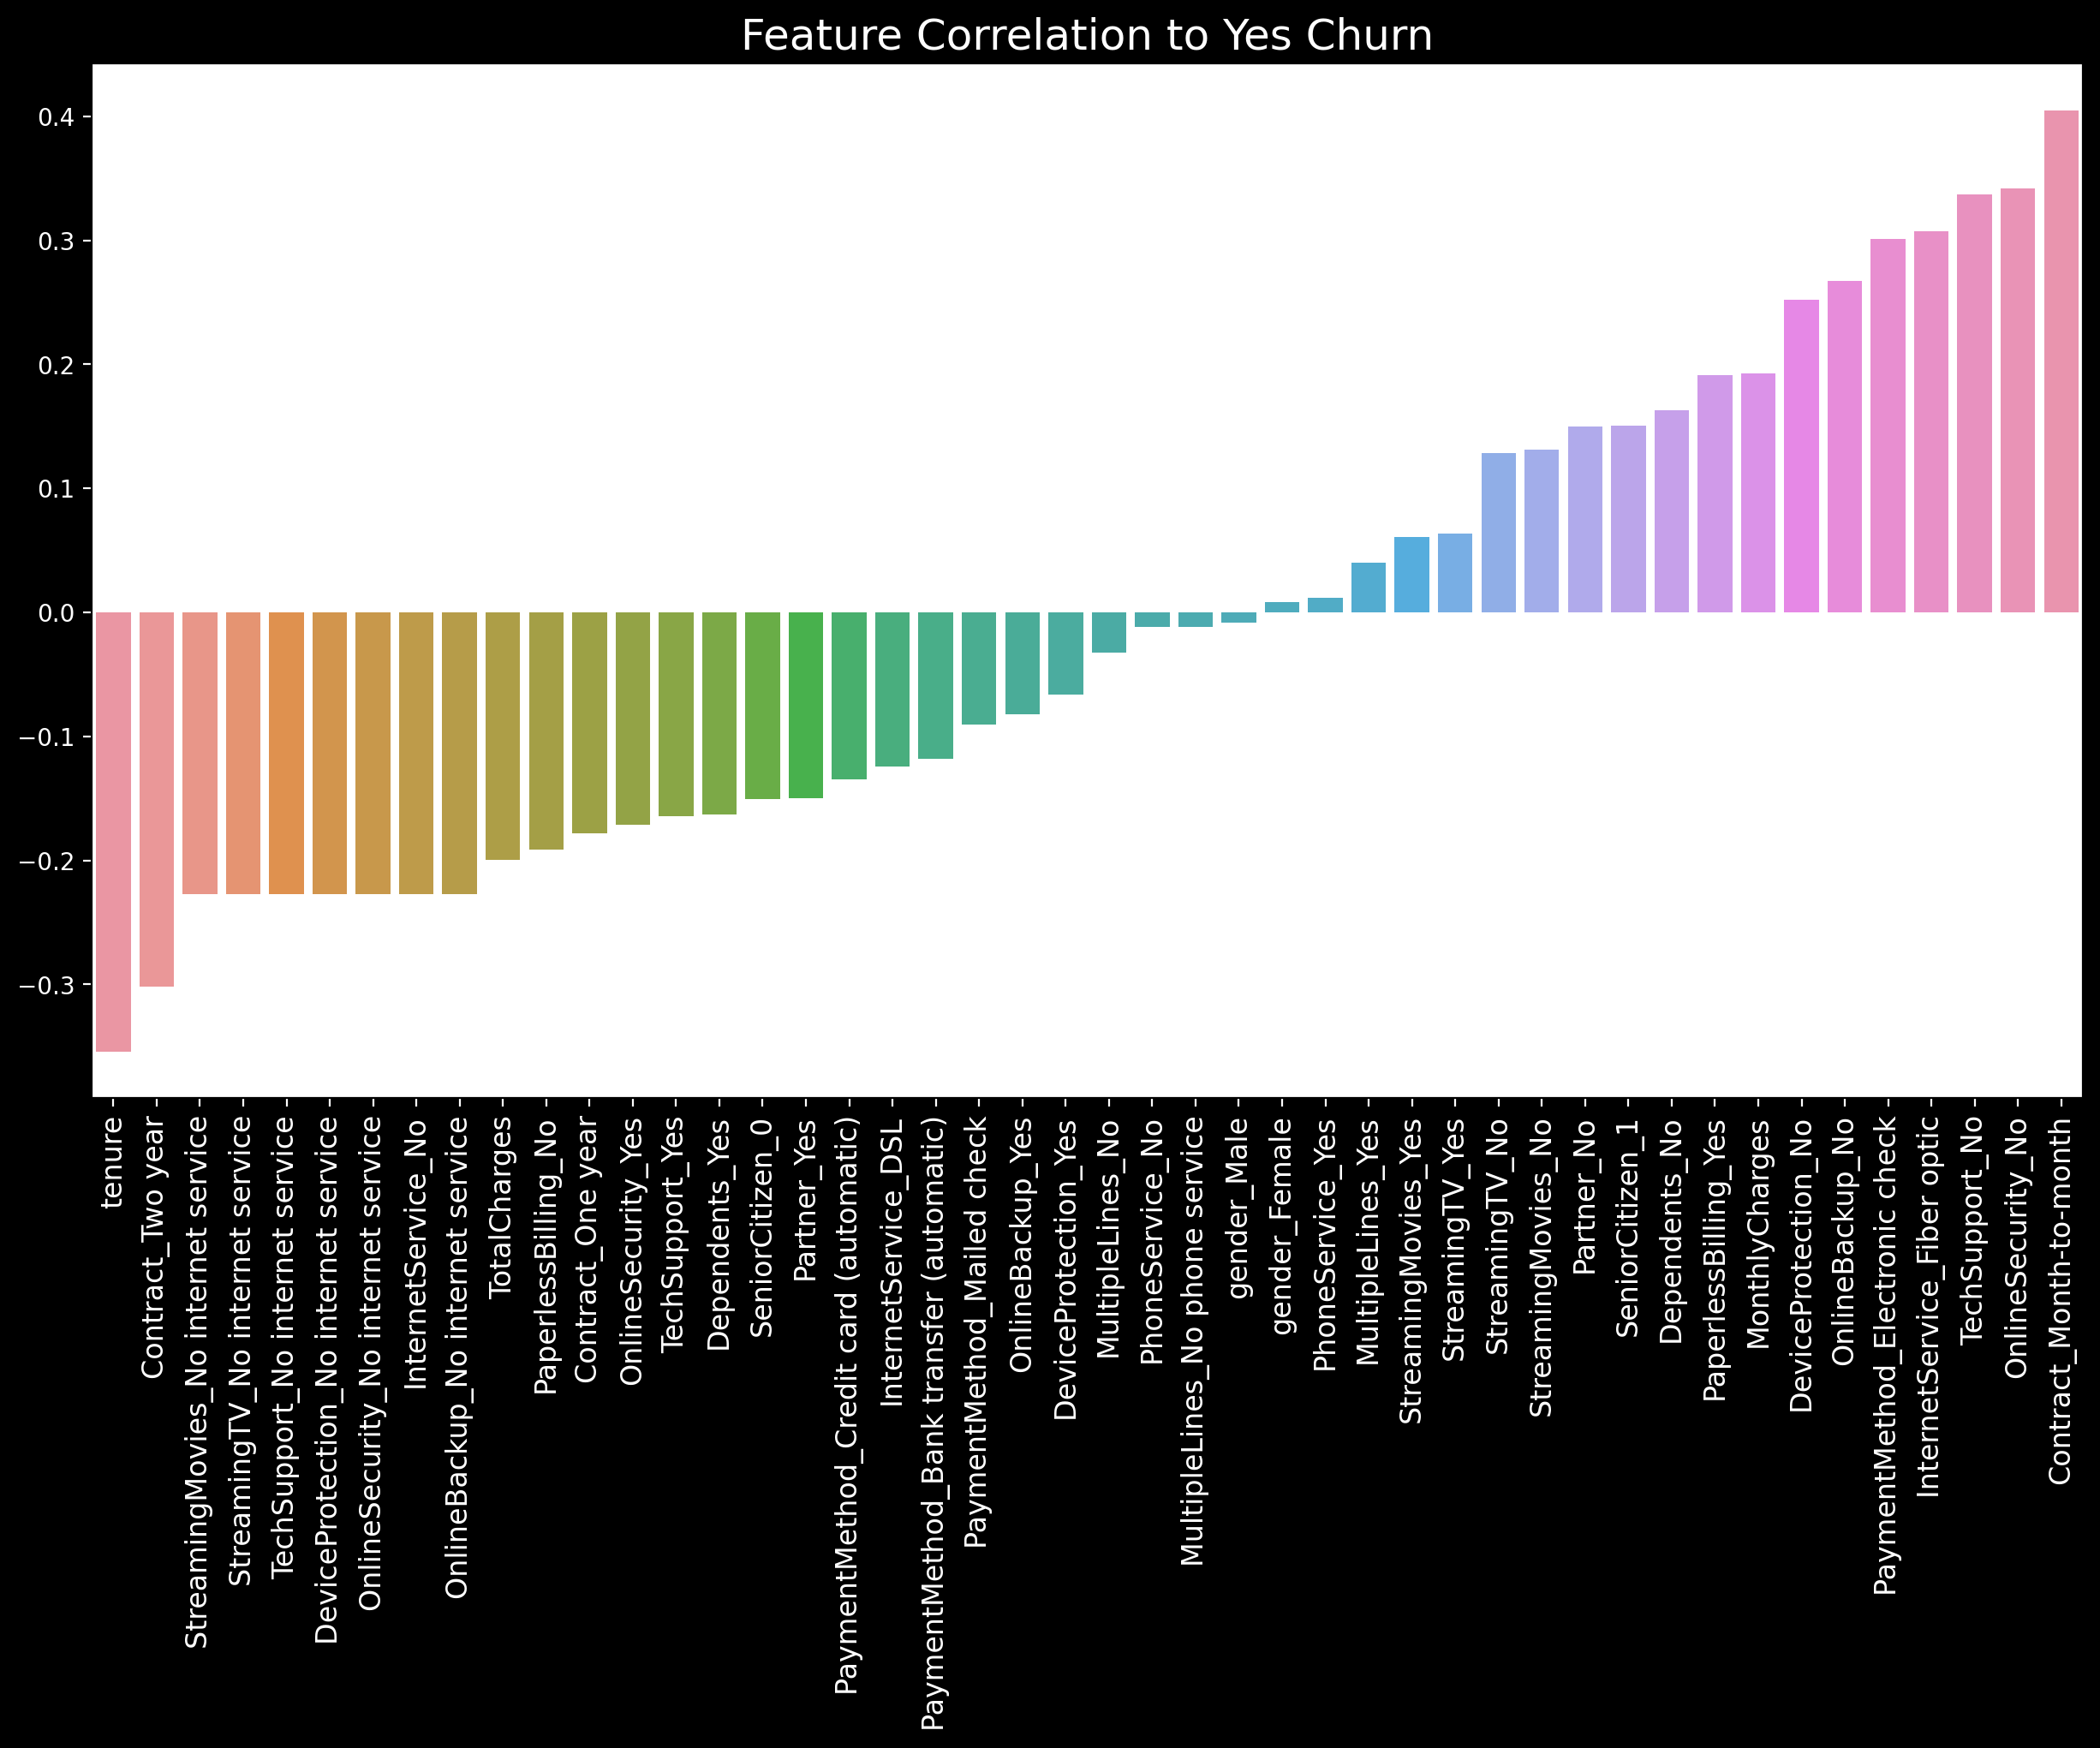

In [13]:
plt.figure(figsize=(15,8),dpi=200)

plt.gcf().patch.set_facecolor('black')

sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn", color='white', fontsize=18)
plt.xticks(rotation=90, fontsize=12)

plt.tick_params(axis='both', colors='white')

plt.savefig("images/feature_correlation.png", bbox_inches='tight')

plt.show()

**Cohort Analysis**

Create Cohort Groups based on tenure (customer subscription duration):

In [14]:
data['CohortGroup'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], 
                             labels=['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '5-6 Years'])

In [15]:
# Convert categorical to numeric
data['CohortGroup'] = data['CohortGroup'].cat.codes

Calculate churn rates based on cohort groups:

In [16]:
cohort_churn = data.groupby('CohortGroup')['Churn_Yes'].mean() * 100

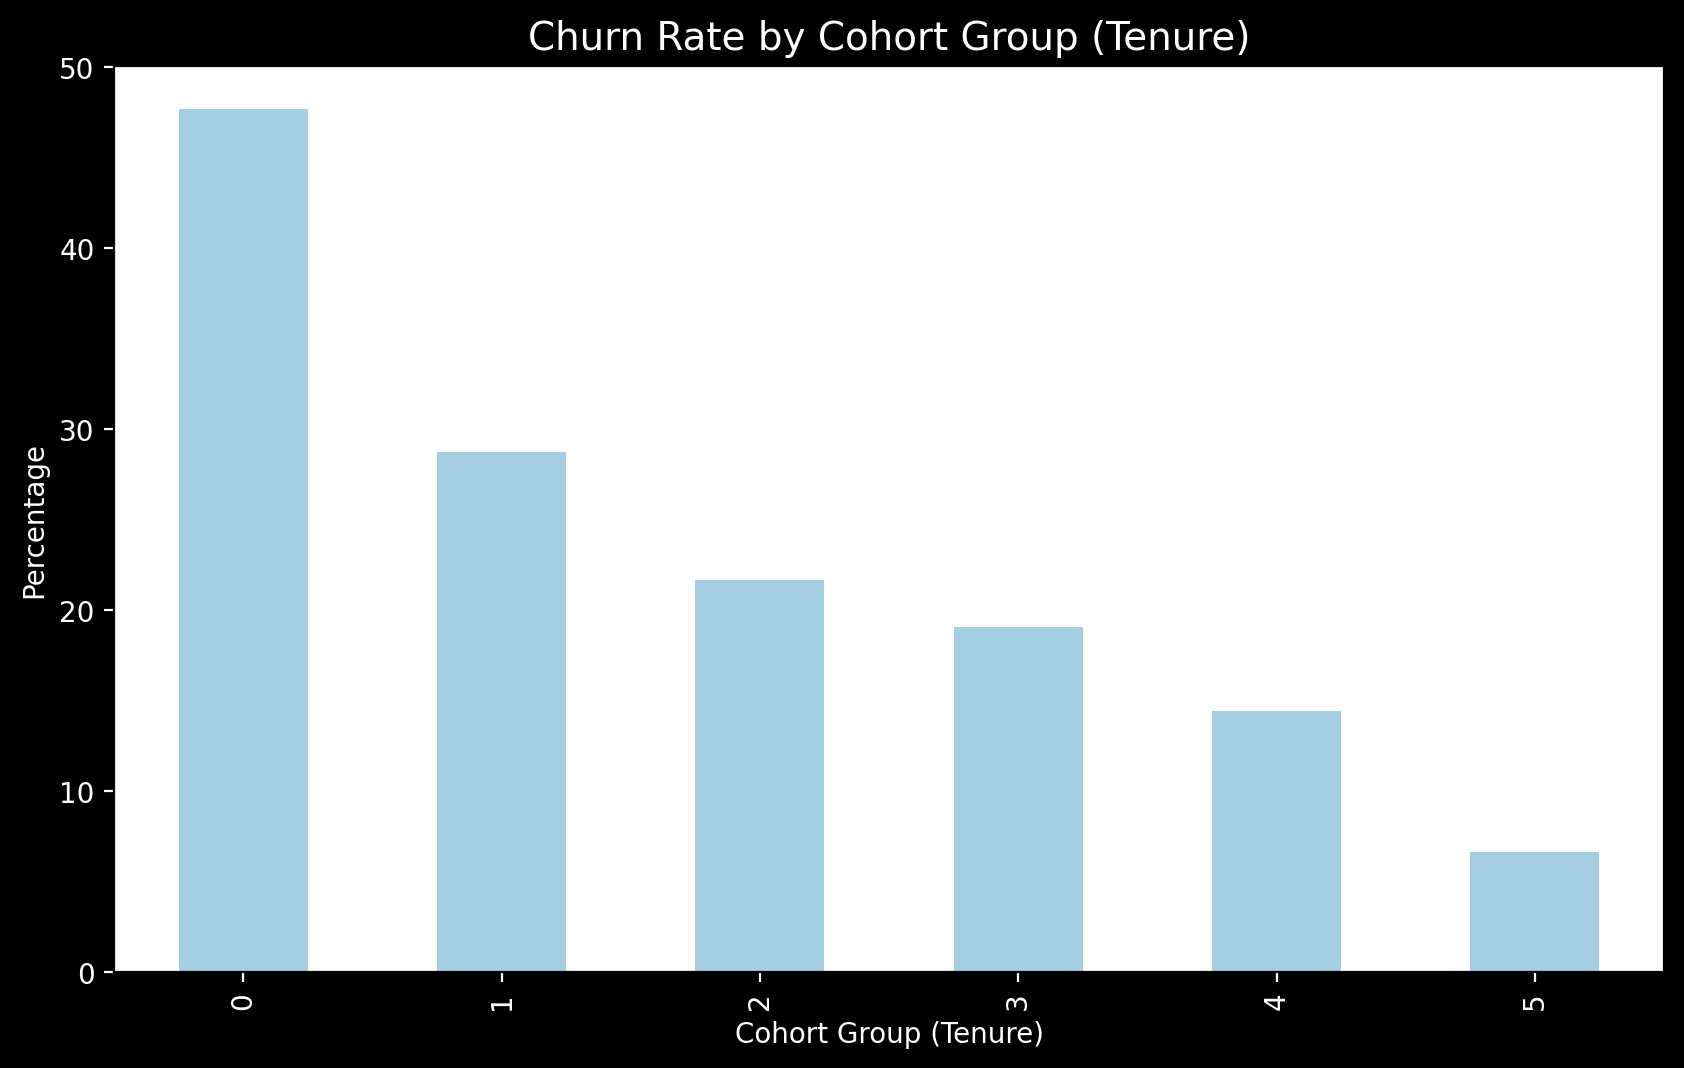

In [17]:
plt.figure(figsize=(10, 6), dpi=200)

plt.gcf().patch.set_facecolor('black')

cohort_churn.plot(kind='bar', colormap='Paired')
plt.title('Churn Rate by Cohort Group (Tenure)', color='white', fontsize=14)
plt.xlabel('Cohort Group (Tenure)', color='white')
plt.ylabel('Percentage', color='white')

plt.tick_params(axis='both', colors='white')

plt.savefig("images/cohort_analysis.png")

plt.show()

## Model Training and Evaluation

In [18]:
X = data.drop(['customerID', 'Churn_Yes', 'Churn_No'], axis=1)
y = data['Churn_Yes']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Define and train different models:

In [21]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [22]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Decision Tree Accuracy: 0.7278
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1033
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.73      0.73      1407

--------------------------------------------------
Random Forest Accuracy: 0.7775
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.52       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407

--------------------------------------------------
Gradient Boosting Accuracy: 0.7889
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50     

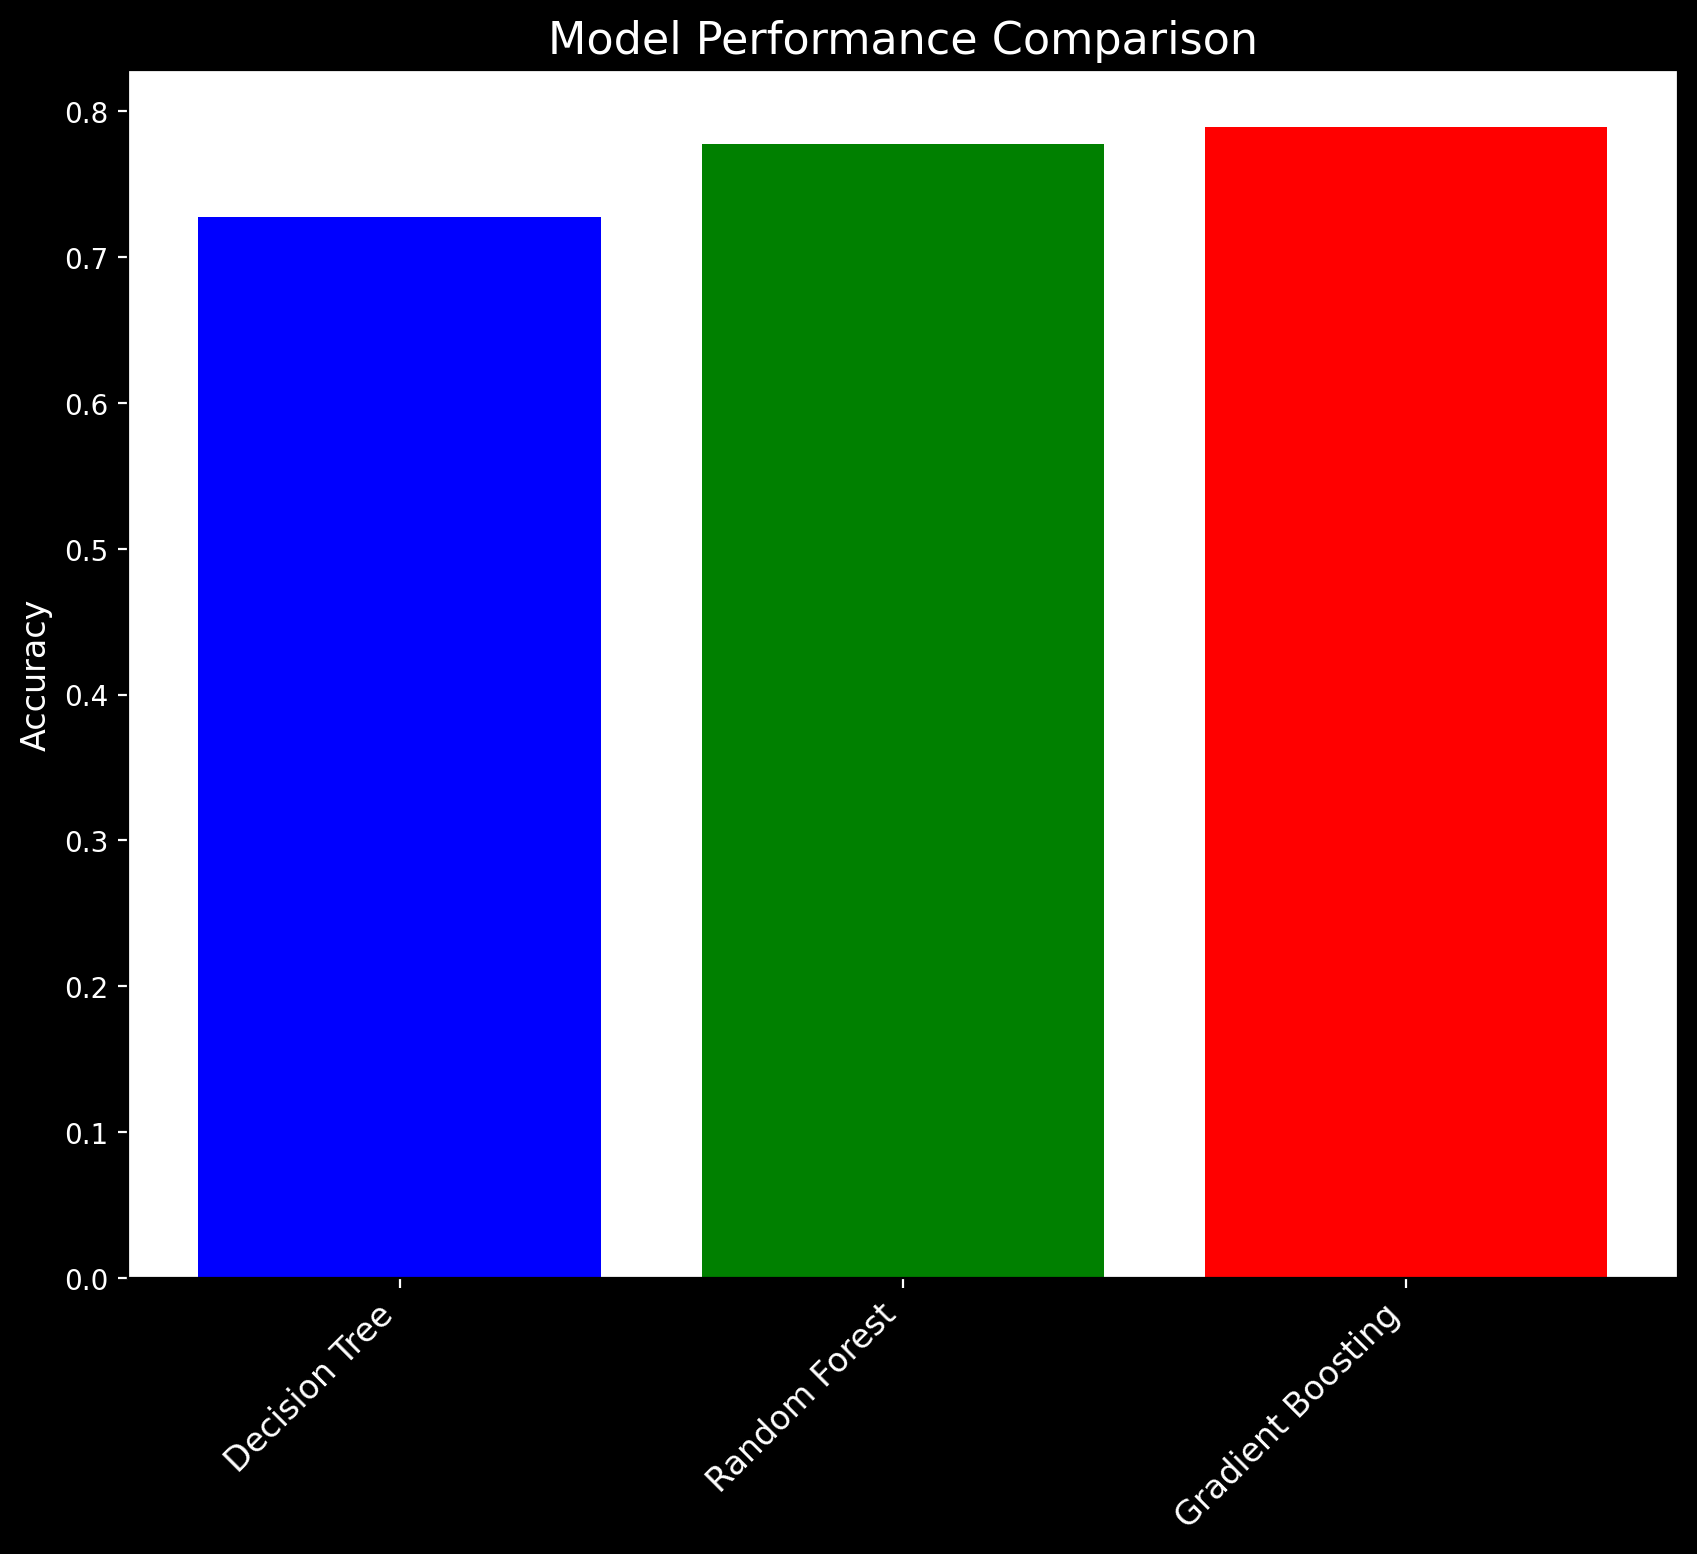

In [23]:
plt.figure(figsize=(10, 8), dpi=200)

plt.gcf().patch.set_facecolor('black')

plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.title("Model Performance Comparison", color='white', fontsize=16)
plt.ylabel("Accuracy", color='white', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tick_params(axis='both', colors='white')

plt.savefig("images/model_comparison.png", bbox_inches='tight')
plt.show()

In [24]:
best_model = max(results, key=results.get)
best_accuracy = results[best_model]
print(f"Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")

Best Model: Gradient Boosting with Accuracy: 0.7889
